In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Mall Customers.csv to Mall Customers.csv


In [ ]:
ds=pd.read_csv('Mall Customers.csv')

In [ ]:
ds.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
x=ds.iloc[:,[1,2,3]]
y=ds.iloc[:,-1]
x.head()

,Genre,Age,Annual Income (k$)
0,Male,19,15
1,Male,21,15
2,Female,20,16
3,Female,23,16
4,Female,31,17


In [ ]:
gen= pd.get_dummies(x['Genre'],drop_first=True)
print(gen)

     Male
0       1
1       1
2       0
3       0
4       0
..    ...
195     0
196     0
197     1
198     1
199     1

[200 rows x 1 columns]


In [ ]:
x.drop(['Genre'],axis=1,inplace=True)
x=pd.concat([x,gen],axis=1)
print(x)

     Age  Annual Income (k$)  Male
0     19                  15     1
1     21                  15     1
2     20                  16     0
3     23                  16     0
4     31                  17     0
..   ...                 ...   ...
195   35                 120     0
196   45                 126     0
197   32                 126     1
198   32                 137     1
199   30                 137     1

[200 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
y.head()

0    39
1    81
2     6
3    77
4    40
Name: Spending Score (1-100), dtype: int64

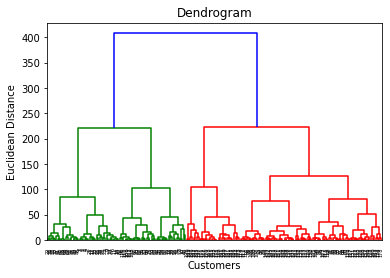

In [ ]:
import scipy.cluster.hierarchy as sch
dg=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
#optimal no of clusters is 2
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
yac=ac.fit_predict(x)

In [ ]:
print(yac)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


No handles with labels found to put in legend.


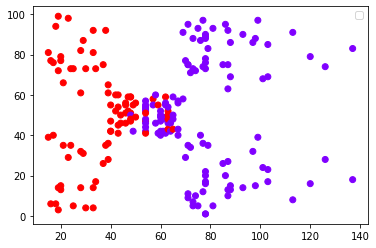

In [ ]:
plt.scatter(x['Annual Income (k$)'],y,c=yac,cmap='rainbow')
#plt.legend()